In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()


In [2]:
#  Données  XCustomerProduct
XCustomer = pd.read_csv('P5_01_4_XCustomersProducts.csv', sep = ',', low_memory=False )
print('forme des données XCustomer: ', XCustomer.shape)
XCustomer.head(10)

forme des données XCustomer:  (99201, 14)


,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,4,29.99,8.72,SUD EST,Maison,1183,9,269.91
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,4,118.70,22.76,NORD EST,santé hygiène bébés et beauté,888,1,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,5,159.90,19.22,CENTRE OUEST,autres catégories,873,1,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,5,45.00,27.20,NORD EST,autres catégories,1136,1,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,5,19.90,8.72,SUD EST,autres catégories,1049,2,39.80
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-08-01 00:00:00,80bb27c7c16e8f973207a5086ab329e2,4,147.90,27.36,SUD,autres catégories,1268,1,147.90
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-05-09 00:00:00,36edbb3fb164b1f16485364b6fb04c73,2,49.90,16.05,SUD,none,1357,1,49.90
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-06-07 00:00:00,932afa1e708222e5821dac9cd5db4cae,5,59.99,15.17,SUD EST,autres catégories,1322,5,299.95
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-03-06 00:00:00,39382392765b6dc74812866ee5ee92a7,1,19.90,16.05,SUD,Maison,1435,3,59.70
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,5,149.99,19.77,SUD EST,Maison,1248,6,899.94


In [3]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for col in XCustomer.columns:
    if XCustomer[col].dtype == 'object':
        XCustomer[col] = labelencoder.fit_transform(XCustomer[col])

XCustomer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
0,88252,61306,2,27269,205,46407,4,29.99,8.72,4,0,1183,9,269.91
1,32271,68221,2,89987,404,65363,4,118.70,22.76,2,6,888,1,118.70
2,27537,25340,2,93872,420,21866,5,159.90,19.22,0,4,873,1,159.90
3,56922,95841,2,34582,244,46354,5,45.00,27.20,2,4,1136,1,45.00
4,66505,53383,2,54622,291,42761,5,19.90,8.72,4,4,1049,2,39.80


In [4]:
 XCustomer

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
0,88252,61306,2,27269,205,46407,4,29.99,8.72,4,0,1183,9,269.91
1,32271,68221,2,89987,404,65363,4,118.70,22.76,2,6,888,1,118.70
2,27537,25340,2,93872,420,21866,5,159.90,19.22,0,4,873,1,159.90
3,56922,95841,2,34582,244,46354,5,45.00,27.20,2,4,1136,1,45.00
4,66505,53383,2,54622,291,42761,5,19.90,8.72,4,4,1049,2,39.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99196,59875,22283,2,3469,64,37153,5,72.00,13.08,4,6,1390,1,72.00
99197,38323,12245,2,53023,293,81527,4,174.90,20.10,4,6,1056,1,174.90
99198,50635,10285,2,22201,191,43145,5,205.99,65.02,2,0,1219,2,411.98
99199,6906,69270,2,46255,284,30145,2,179.99,40.59,4,7,1085,4,719.96


In [5]:
X1 = XCustomer.values

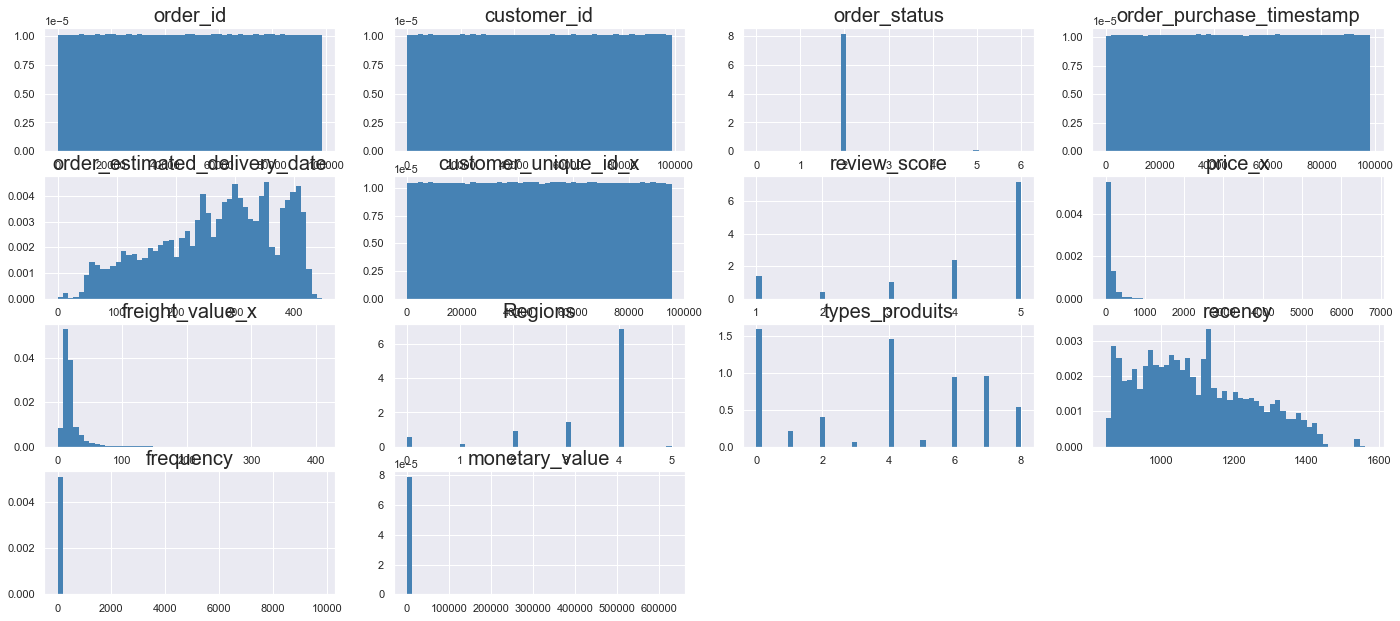

In [6]:
fig = plt.figure(figsize=(24, 24))
for feat_idx in range(X1.shape[1]):
    ax = fig.add_subplot(9,4, (feat_idx+1))
    ax.set_title(XCustomer.columns[feat_idx], fontdict={'fontsize': 20, 'fontweight': 'medium'})
    
    h = ax.hist(X1[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')

In [7]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

std_scale = preprocessing.StandardScaler().fit(X1)
X_scaled = std_scale.transform(X1)

reduced_data = PCA(n_components=2).fit_transform(X_scaled)

In [8]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [9]:
print(pca.explained_variance_ratio_)

[0.21351265 0.13543905]


In [10]:
print(pca.explained_variance_ratio_.cumsum())

[0.21351265 0.3489517 ]


In [11]:
print(pca.explained_variance_ratio_.sum())

0.34895169721861985


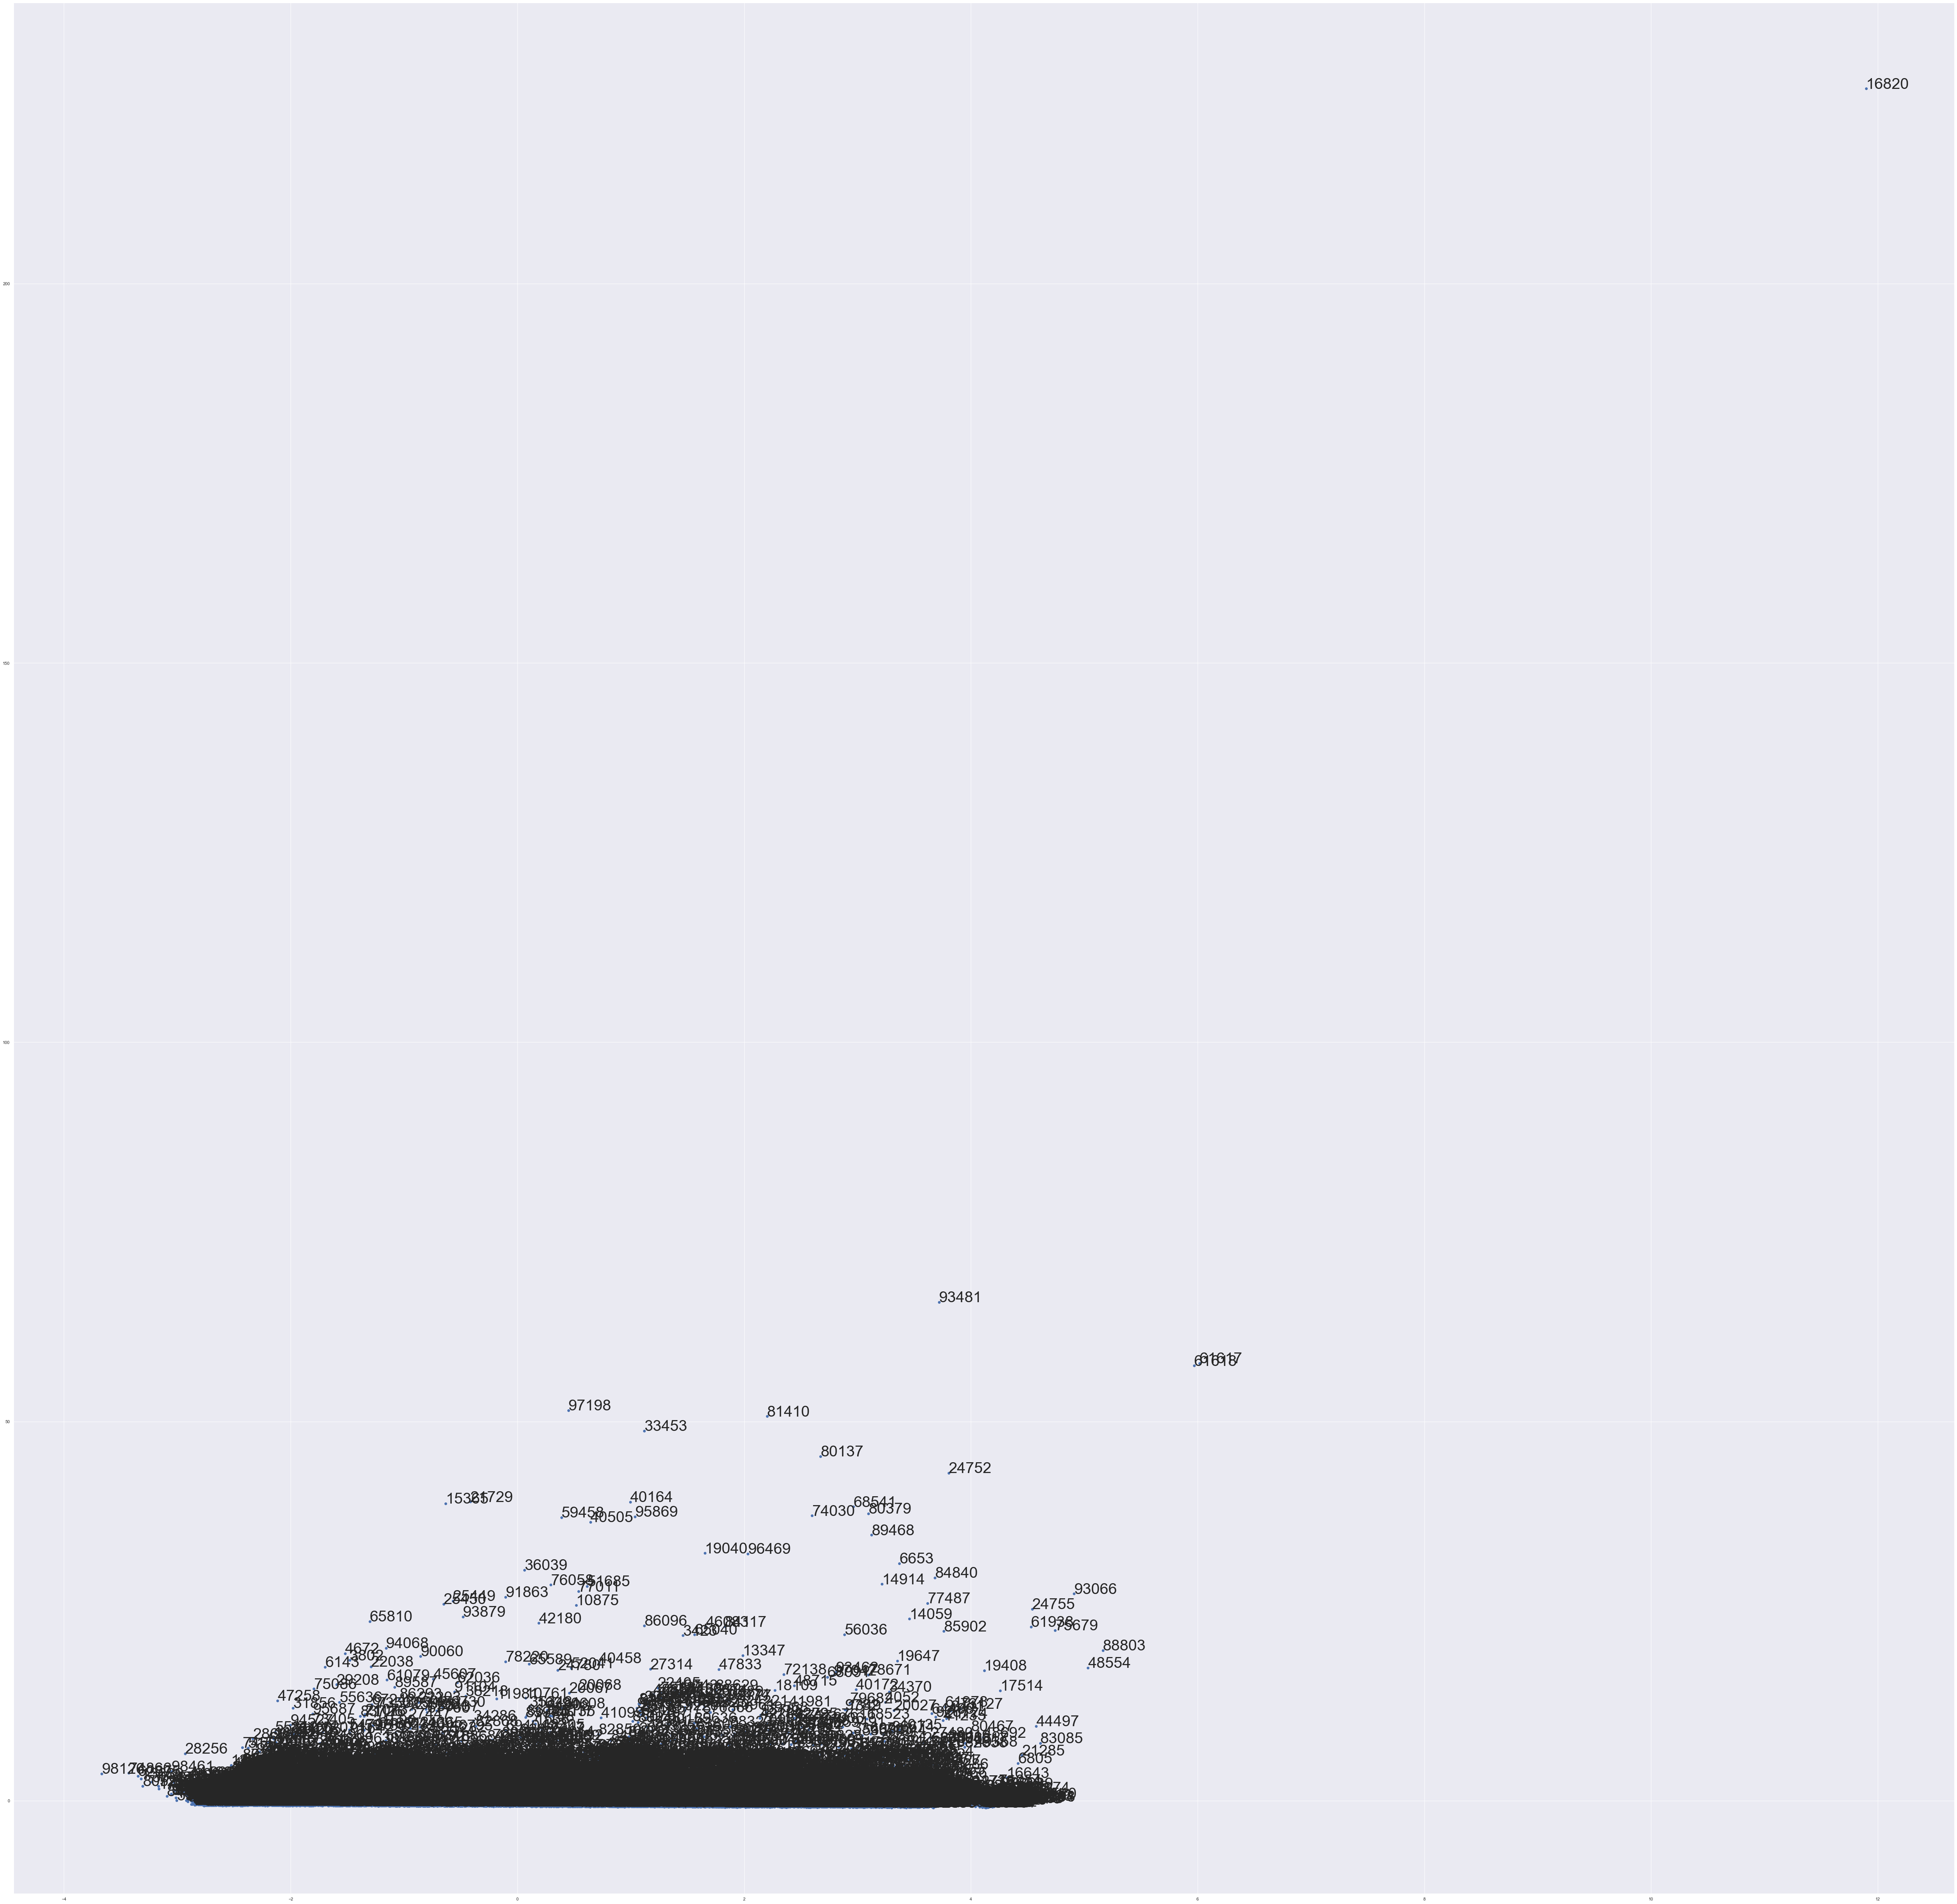

In [12]:
fig = plt.figure(figsize=(90, 90))
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)
# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1])
            
for i, (x, y) in enumerate(zip(X_projected[:, 0], X_projected[:, 1])):
    plt.text(x ,y ,XCustomer.index[i], fontsize=40)

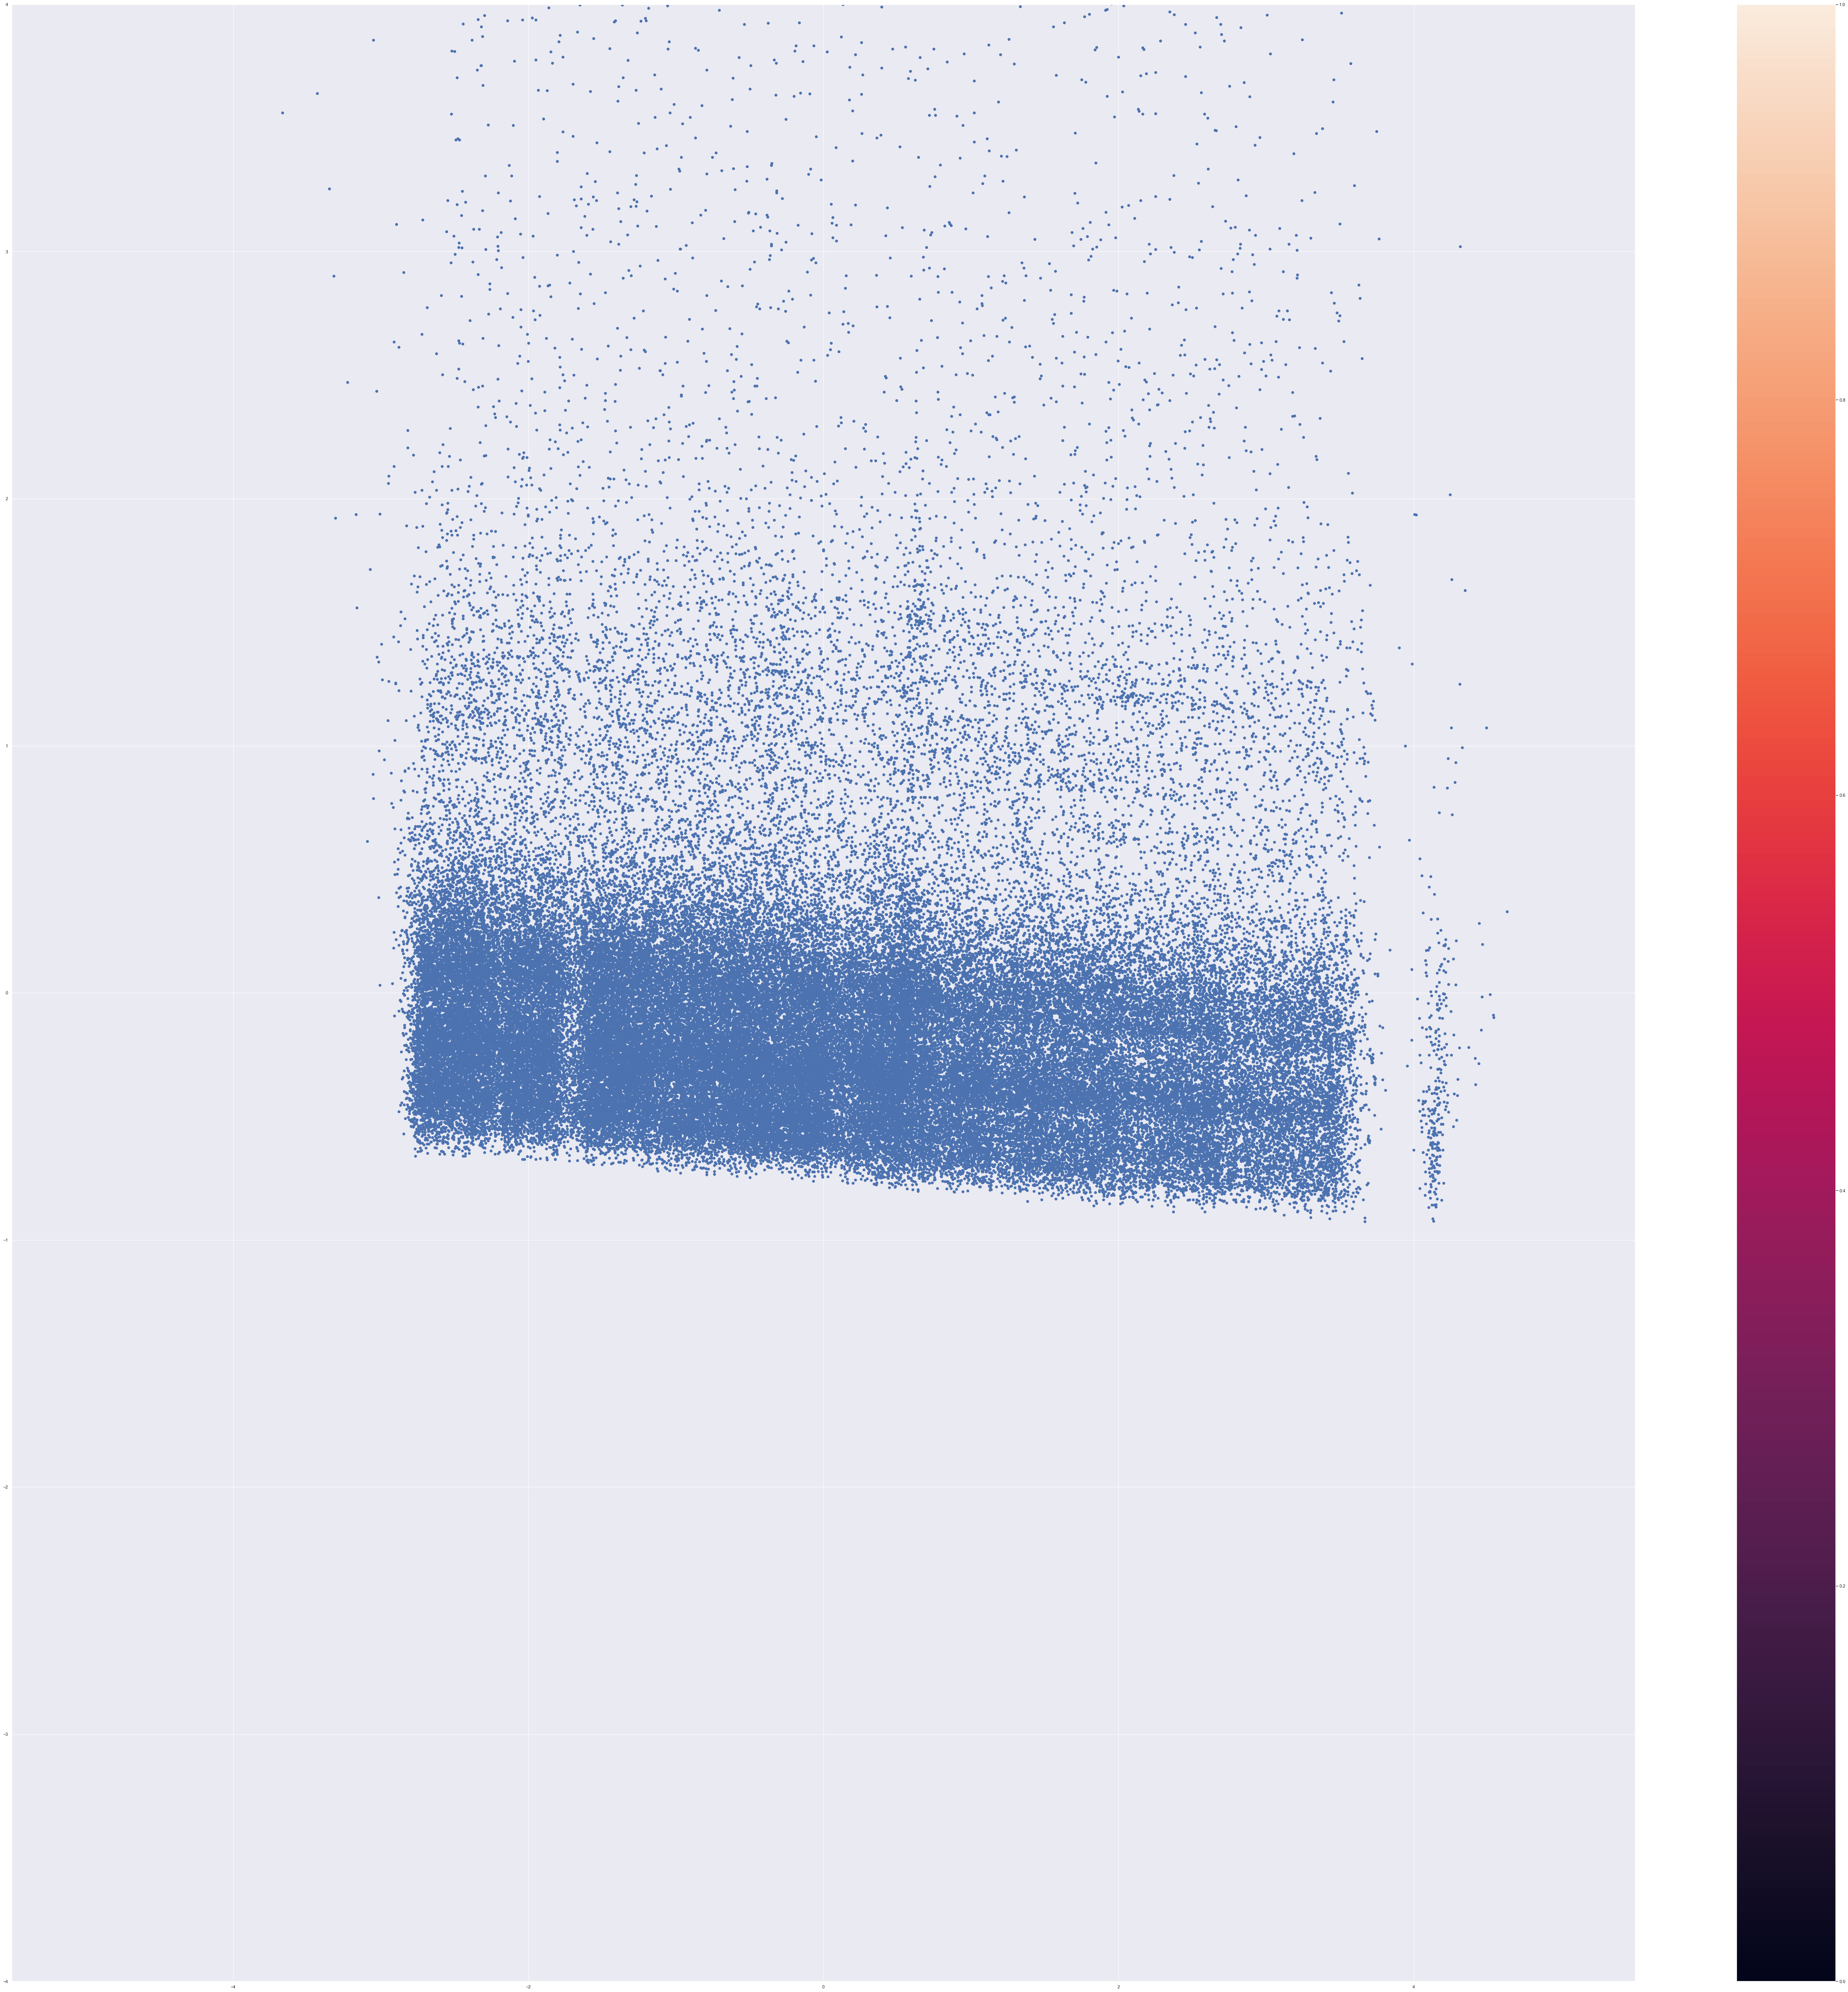

In [13]:
# projeter X sur les composantes principales
fig = plt.figure(figsize=(90, 90))
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=XCustomer.get('Rank'))

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

(-0.7, 0.7)

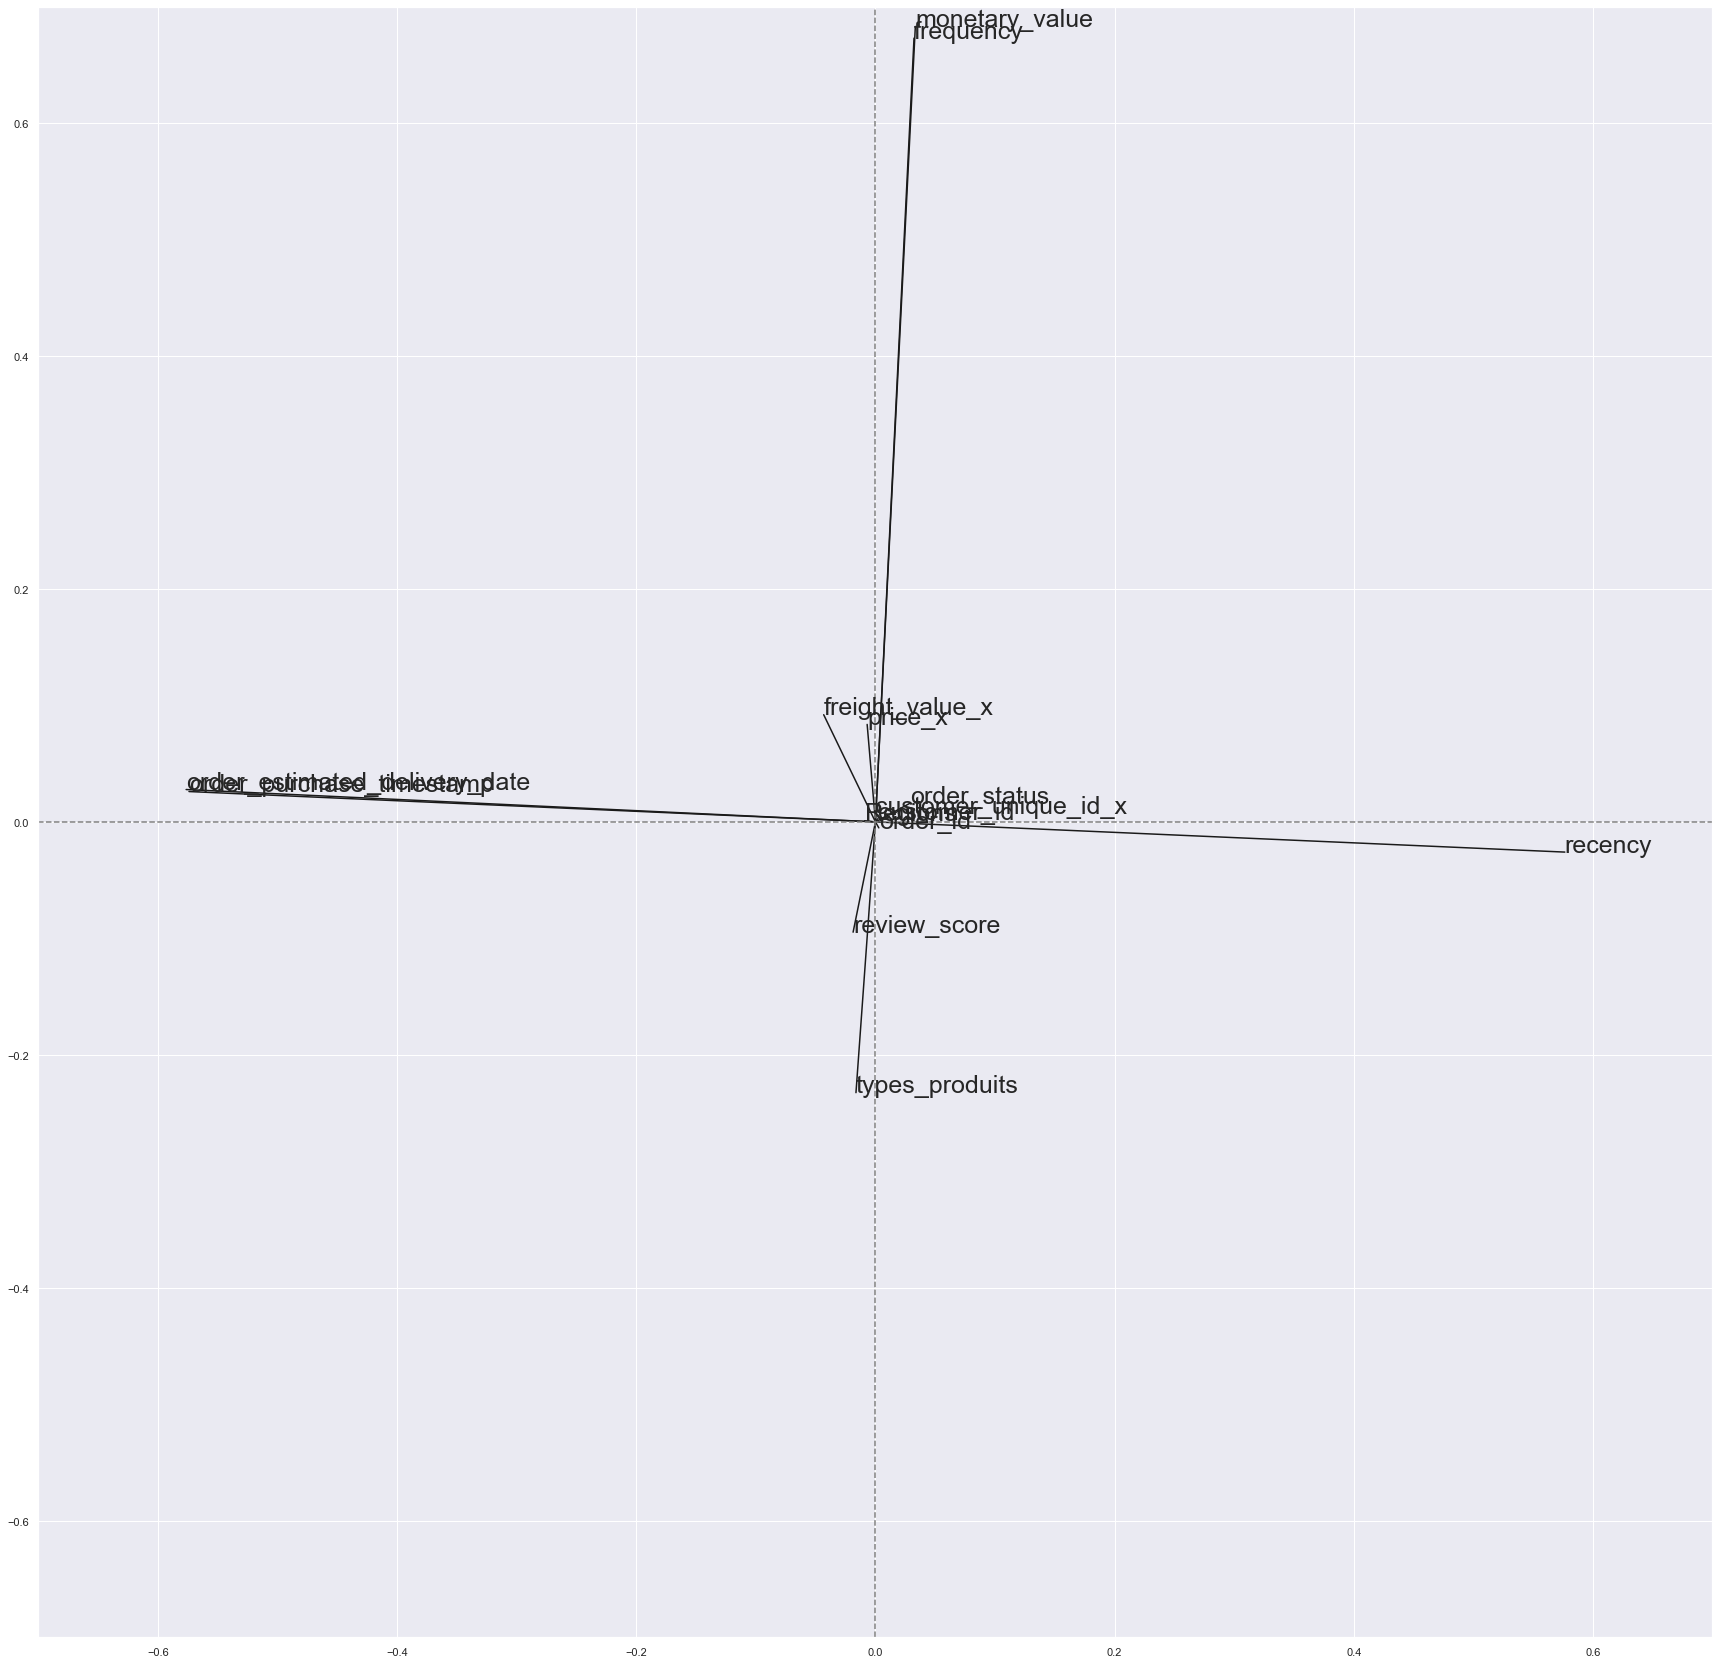

In [14]:
pcs = pca.components_
fig = plt.figure(figsize=(30, 30))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, XCustomer.columns[i], fontsize='25')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

# MODEL KMeans

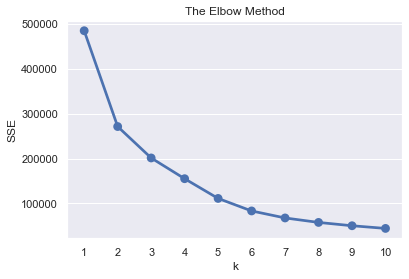

In [15]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(reduced_data)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [16]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(reduced_data)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_k7 = XCustomer.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_k7.groupby(['Cluster']).agg({
    'order_id': 'mean',
    'customer_id': 'mean',
    'order_status': 'mean',    
    'order_purchase_timestamp': 'mean',
    'order_estimated_delivery_date': 'mean',
    'customer_unique_id_x': 'mean',
    'review_score': 'mean',
    'price_x': 'mean',
    'freight_value_x': 'mean',  
    'Regions': 'mean',
    'types_produits': 'mean',    
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean'
}).round(0)

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
Cluster,,,,,,,,,,,,,,
0,49230.0,49175.0,2.0,31270.0,223.0,47799.0,4.0,125.0,20.0,3.0,4.0,1164.0,6.0,572.0
1,49258.0,49188.0,2.0,84737.0,387.0,47764.0,4.0,133.0,22.0,3.0,4.0,916.0,6.0,518.0
2,48700.0,48081.0,2.0,45605.0,260.0,49899.0,3.0,171.0,22.0,3.0,0.0,1109.0,235.0,18521.0
3,34716.0,73568.0,2.0,29538.0,216.0,81148.0,1.0,70.0,34.0,4.0,0.0,1168.0,9834.0,629379.0
4,42641.0,49256.0,2.0,44570.0,250.0,46211.0,3.0,136.0,22.0,4.0,1.0,1124.0,1254.0,97303.0
5,49133.0,49447.0,2.0,57580.0,307.0,47553.0,4.0,120.0,20.0,3.0,4.0,1037.0,6.0,489.0
6,49871.0,49642.0,2.0,9434.0,110.0,47642.0,4.0,124.0,19.0,3.0,4.0,1332.0,7.0,633.0


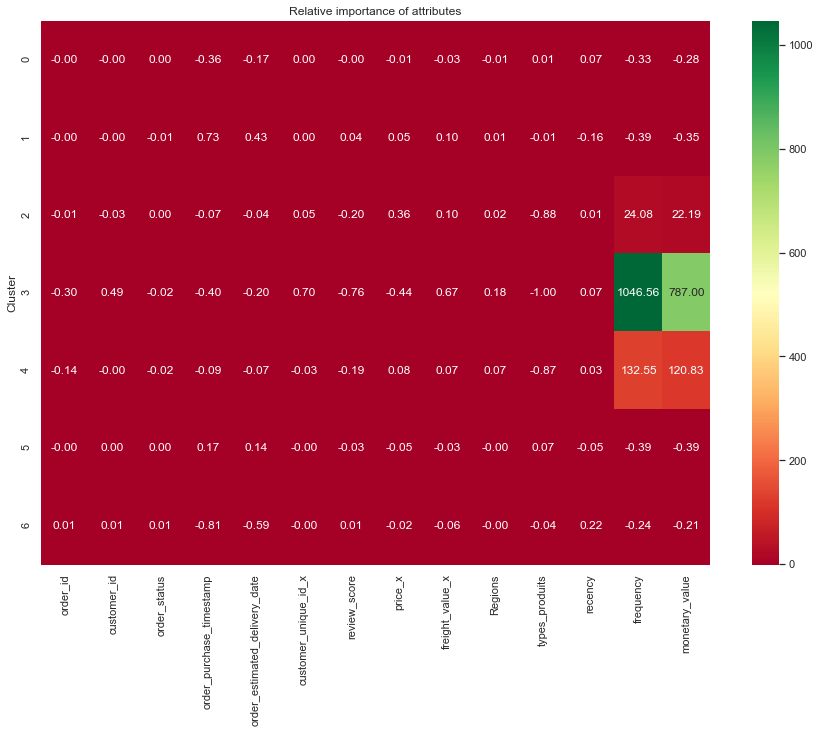

In [17]:
# Calculate average data values for each cluster
cluster_avg = data_process_k7.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


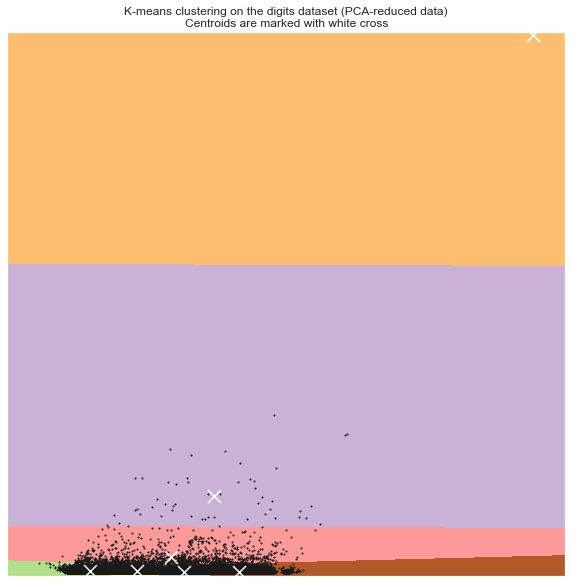

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [19]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(reduced_data)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_k5 = XCustomer.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_k5.groupby(['Cluster']).agg({
    'order_id': 'mean',
    'customer_id': 'mean',
    'order_status': 'mean',    
    'order_purchase_timestamp': 'mean',
    'order_estimated_delivery_date': 'mean',
    'customer_unique_id_x': 'mean',
    'review_score': 'mean',
    'price_x': 'mean',
    'freight_value_x': 'mean',  
    'Regions': 'mean',
    'types_produits': 'mean',    
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean'
}).round(0)

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
Cluster,,,,,,,,,,,,,,
0,48823.0,51391.0,2.0,42168.0,246.0,49055.0,3.0,127.0,21.0,3.0,0.0,1130.0,567.0,43163.0
1,49615.0,49405.0,2.0,13007.0,131.0,47538.0,4.0,125.0,19.0,3.0,4.0,1301.0,9.0,758.0
2,49292.0,49213.0,2.0,80395.0,374.0,47775.0,4.0,131.0,22.0,3.0,4.0,936.0,7.0,610.0
3,34716.0,73568.0,2.0,29538.0,216.0,81148.0,1.0,70.0,34.0,4.0,0.0,1168.0,9834.0,629379.0
4,49150.0,49375.0,2.0,44378.0,267.0,47766.0,4.0,121.0,19.0,3.0,4.0,1097.0,7.0,636.0


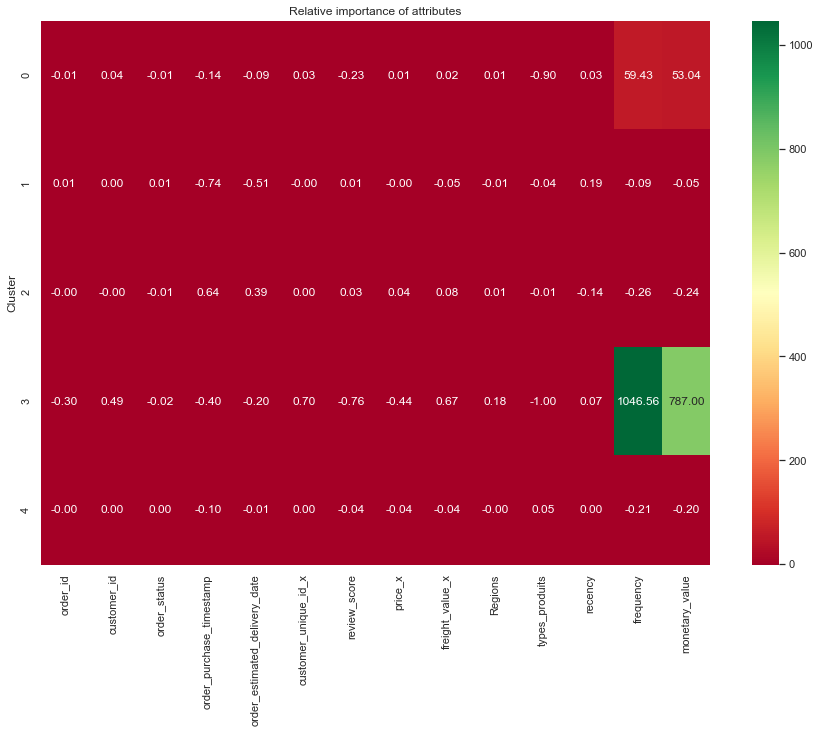

In [20]:
# Calculate average data values for each cluster
cluster_avg = data_process_k5.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

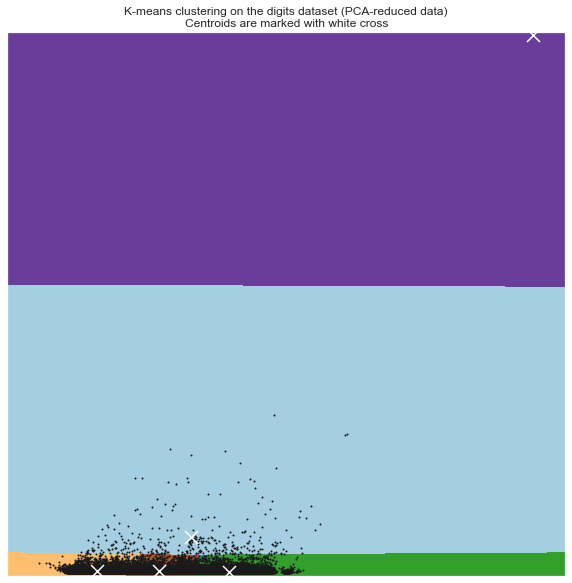

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [22]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(reduced_data)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_k4 = XCustomer.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_k4.groupby(['Cluster']).agg({
    'order_id': 'mean',
    'customer_id': 'mean',
    'order_status': 'mean',    
    'order_purchase_timestamp': 'mean',
    'order_estimated_delivery_date': 'mean',
    'customer_unique_id_x': 'mean',
    'review_score': 'mean',
    'price_x': 'mean',
    'freight_value_x': 'mean',  
    'Regions': 'mean',
    'types_produits': 'mean',    
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean'
}).round(0)

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
Cluster,,,,,,,,,,,,,,
0,49144.0,49376.0,2.0,44309.0,267.0,47761.0,4.0,121.0,19.0,3.0,4.0,1097.0,8.0,659.0
1,49300.0,49215.0,2.0,80348.0,374.0,47783.0,4.0,131.0,22.0,3.0,4.0,936.0,7.0,632.0
2,49600.0,49396.0,2.0,12987.0,131.0,47553.0,4.0,126.0,19.0,3.0,4.0,1301.0,9.0,803.0
3,50121.0,53635.0,2.0,42194.0,246.0,47483.0,3.0,115.0,20.0,3.0,0.0,1130.0,759.0,57661.0


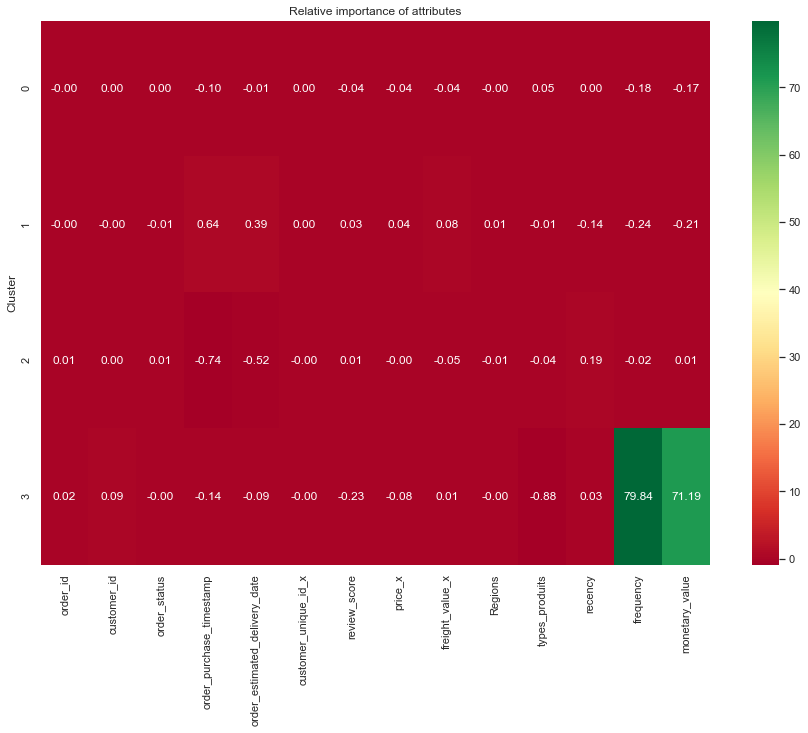

In [23]:
# Calculate average data values for each cluster
cluster_avg = data_process_k4.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


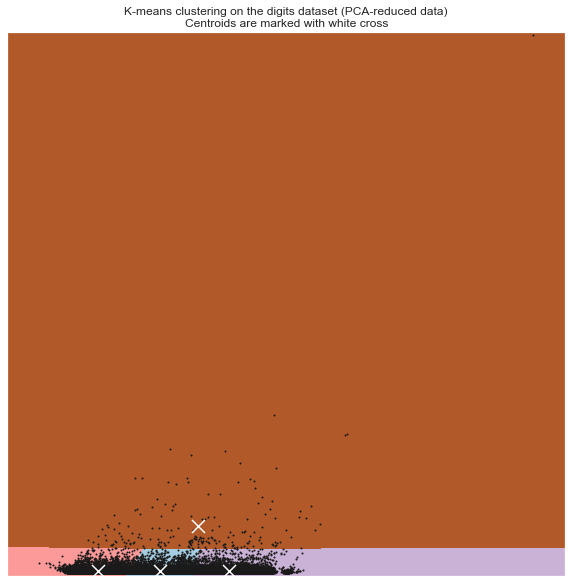

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [25]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(reduced_data)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_k3 = XCustomer.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_k3.groupby(['Cluster']).agg({
    'order_id': 'mean',
    'customer_id': 'mean',
    'order_status': 'mean',    
    'order_purchase_timestamp': 'mean',
    'order_estimated_delivery_date': 'mean',
    'customer_unique_id_x': 'mean',
    'review_score': 'mean',
    'price_x': 'mean',
    'freight_value_x': 'mean',  
    'Regions': 'mean',
    'types_produits': 'mean',    
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean'
}).round(0)

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
Cluster,,,,,,,,,,,,,,
0,49492.0,49348.0,2.0,21774.0,174.0,47747.0,4.0,125.0,19.0,3.0,4.0,1237.0,9.0,765.0
1,49185.0,49303.0,2.0,70806.0,346.0,47688.0,4.0,126.0,21.0,3.0,4.0,978.0,7.0,625.0
2,50121.0,53635.0,2.0,42194.0,246.0,47483.0,3.0,115.0,20.0,3.0,0.0,1130.0,759.0,57661.0


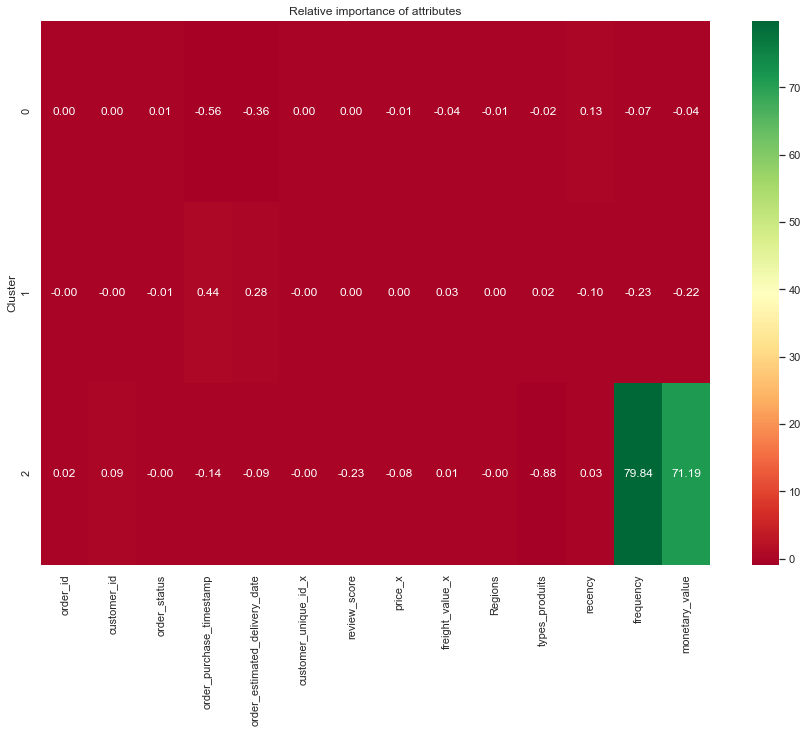

In [26]:
# Calculate average data values for each cluster
cluster_avg = data_process_k3.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


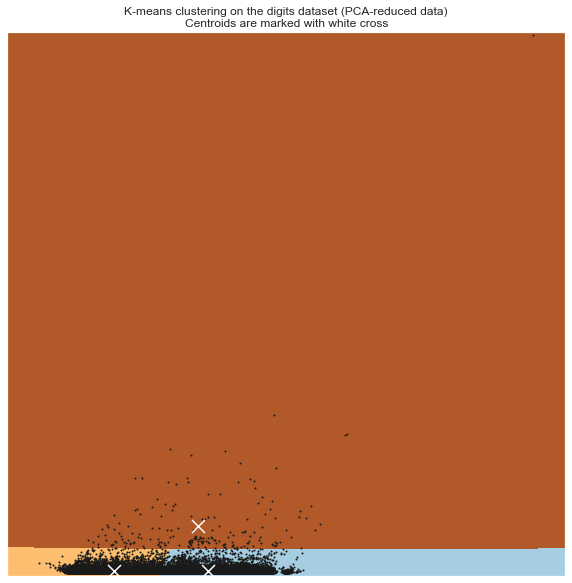

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# MODEL DBSCAN

In [28]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.datasets import make_blobs
#from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
  
# Load data in X 
db = DBSCAN(eps=0.3, min_samples=10).fit(reduced_data) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
cluster_labels = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0) 
 
print(cluster_labels) 

# Assign cluster labels to original pre-transformed data set
data_process_ds = XCustomer.assign(Cluster = cluster_labels)
# Group data set by DBSCAN cluster
data_process_ds.groupby(['Cluster']).agg({
    'order_id': 'mean',
    'customer_id': 'mean',
    'order_status': 'mean',    
    'order_purchase_timestamp': 'mean',
    'order_estimated_delivery_date': 'mean',
    'customer_unique_id_x': 'mean',
    'review_score': 'mean',
    'price_x': 'mean',
    'freight_value_x': 'mean',  
    'Regions': 'mean',
    'types_produits': 'mean',    
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean'
}).round(0) 

[0 0 0 ... 0 0 0]


,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
Cluster,,,,,,,,,,,,,,
-1,48096.0,50786.0,2.0,41595.0,239.0,49387.0,3.0,197.0,26.0,3.0,0.0,1141.0,478.0,36754.0
0,49326.0,49331.0,2.0,49155.0,270.0,47697.0,4.0,125.0,20.0,3.0,4.0,1092.0,7.0,604.0
1,49691.0,46405.0,2.0,31772.0,216.0,51969.0,3.0,212.0,22.0,3.0,0.0,1174.0,184.0,18598.0
2,43104.0,44118.0,2.0,17850.0,163.0,54784.0,4.0,93.0,18.0,4.0,0.0,1252.0,176.0,15253.0
3,71993.0,35527.0,2.0,63465.0,323.0,64384.0,4.0,115.0,21.0,3.0,1.0,1012.0,200.0,20137.0


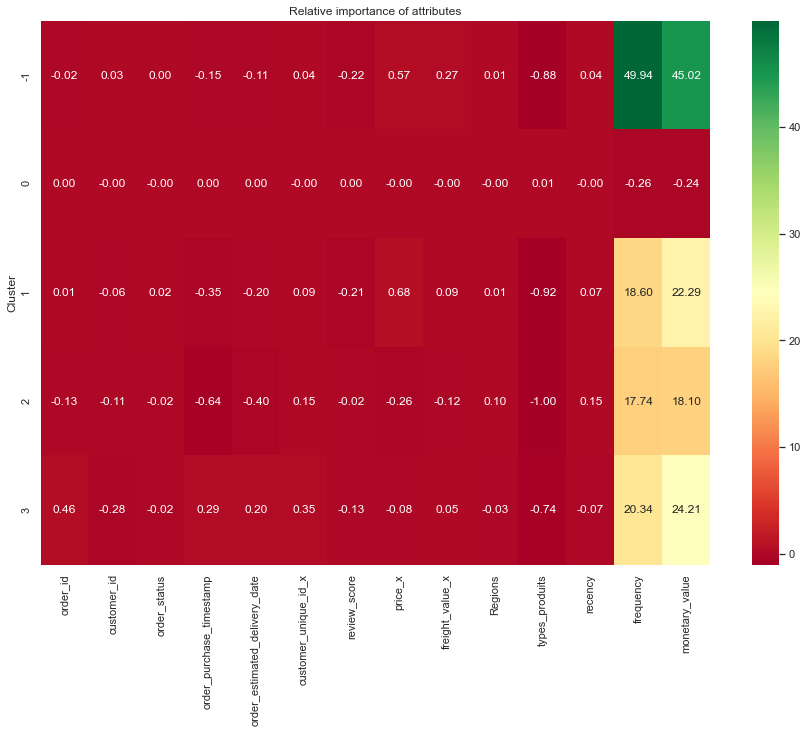

In [29]:
# Calculate average data values for each cluster
cluster_avg = data_process_ds.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

[0 0 0 ... 0 0 0]
['y', 'b', 'g', 'r']


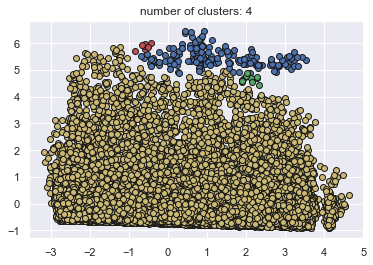

In [30]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.datasets import make_blobs
#from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
  
# Load data in X 
db = DBSCAN(eps=0.3, min_samples=10).fit(reduced_data) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

print(labels) 
  
# Plot result 
import matplotlib.pyplot as plt 
  
# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r']
#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = reduced_data[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = reduced_data[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 

# COMPARE MODELS KMeans vs DBSCAN

In [31]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
#XCustomer_norm, true_labels = XCustomer(
#    n_samples=250, noise=0.05, random_state=42
#)
#scaled_features = scaler.fit_transform(reduced_data)
scaled_features = reduced_data
scaled_features

array([[ 1.19932997,  0.0615889 ],
       [-2.37921845, -0.25861057],
       [-2.58499266, -0.16644887],
       ...,
       [ 1.3493683 ,  0.31783757],
       [-0.11286036, -0.04275284],
       [-0.75648762, -0.44261366]])

In [33]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [34]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, random_state=42)

In [35]:
# The lowest SSE value
kmeans.inertia_

155191.96873488915

In [36]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.12732408, -0.0618922 ],
       [ 2.30525265, -0.10328453],
       [-1.82471221,  0.03455772],
       [ 1.34446923, 18.61259406]])

In [37]:
# The number of iterations required to converge
kmeans.n_iter_

30

In [38]:
kmeans.labels_[:5]


array([0, 2, 2, 0, 0])

In [39]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

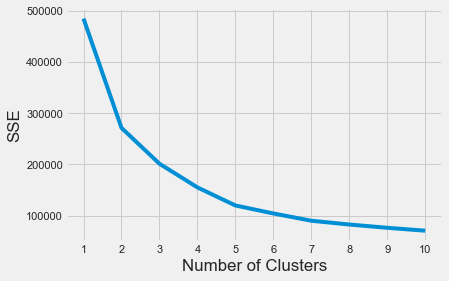

In [40]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()


In [41]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [42]:
kl.elbow

4

In [43]:
#A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

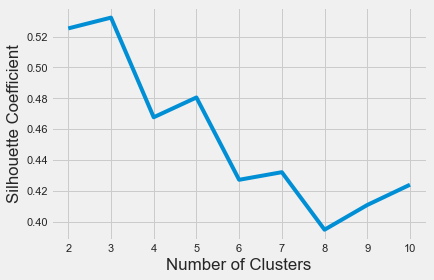

In [44]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [46]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=5)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

In [47]:
kmeans_silhouette

0.47

In [48]:
dbscan_silhouette

0.66

In [49]:
X = scaled_features

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

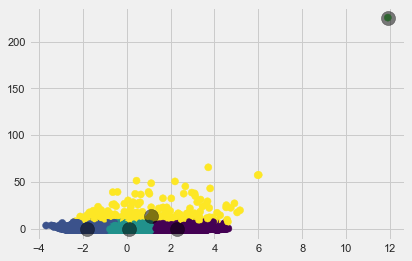

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### CONCLUSION: Problème de nettoyage et de choix des features